In [1]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

%run ../JM_custom_figs.py
%run ../fx4roc.py

C:\Github\Distraction-Paper\JM_custom_figs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [3]:
rats = disDict.keys()
rat= 'thph1.2'
d = disDict[rat]
d.keys()

dict_keys(['rat', 'fs', 'tick', 'filt_sd', 'licks', 'licks_off', 'distractors', 'distracted', 'notdistracted', 'd_bool_array', 'pdp', 'pre_dp', 'lickdata', 'snips_distractors', 'snips_distracted', 'snips_not-distracted'])

In [13]:
def resample_snips(snips, factor=0.1):
    if len(snips)>0:
        n_bins = len(snips[0])
        out_bins = int(n_bins * factor)

        snips_out = []
        for snip in snips:
            snips_out.append(np.mean(np.reshape(snip, (out_bins, -1)), axis=1))
    
        return snips_out
    else:
        return []

In [16]:
photo_snips_dis, photo_snips_notdis, = [], []

rats=disDict.keys()

for rat in rats:
    d = disDict[rat]
    
    snips_dis = resample_snips(d['snips_distracted']['filt_z'])
    photo_snips_dis.append(snips_dis)
    
    snips_notdis = resample_snips(d['snips_not-distracted']['filt_z'])
    photo_snips_notdis.append(snips_notdis)
    
photo_snips_dis_flat = flatten_list(photo_snips_dis)
photo_snips_notdis_flat = flatten_list(photo_snips_notdis)
    

In [6]:
try:
    pickle_in = open(outputfolder+"roc_results_photo_disVnotdis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[a, p, photo_snips_dis, photo_snips_notdis] = dill.load(pickle_in)

In [21]:
# Cell to run ROC analysis on DISTRACTED vs. NON-DISTRACTED - takes a while so commented out unless needed
%run ../fx4roc.py
import time
start_time = time.time()

# a, p = nanroc(photo_snips_notdis_flat, photo_snips_dis_flat, n4shuf=2000)

print(f"--- Total ROC analysis took {(time.time() - start_time)} seconds ---")


Analysing column 0
Analysing column 1
Analysing column 2
Analysing column 3
Analysing column 4
Analysing column 5
Analysing column 6
Analysing column 7
Analysing column 8
Analysing column 9
Analysing column 10
Analysing column 11
Analysing column 12
Analysing column 13
Analysing column 14
Analysing column 15
Analysing column 16
Analysing column 17
Analysing column 18
Analysing column 19
--- Total ROC analysis took 219.40415692329407 seconds ---


In [39]:
savefile=True
if savefile:
    pickle_out = open(outputfolder+"roc_results_photo_disVnotdis.pickle", 'wb')
    dill.dump([a, p, photo_snips_dis, photo_snips_notdis], pickle_out)
    pickle_out.close()

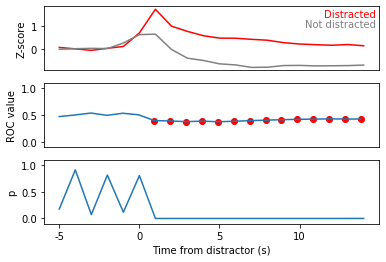

In [70]:
f, ax = plt.subplots(nrows=3)

ax[0].plot(np.mean(photo_snips_dis_flat, axis=0), color='red')
ax[0].plot(np.mean(photo_snips_notdis_flat, axis=0), color='grey')

ax[0].set_ylabel('Z-score')
ax[0].set_xticks([])

ax[0].text(0.99, 0.95, 'Distracted', color='red', ha='right', va='top', transform=ax[0].transAxes)
ax[0].text(0.99, 0.80, 'Not distracted', color='grey', ha='right', va='top', transform=ax[0].transAxes)

ax[1].plot(a)
ax[1].set_ylabel('ROC value')
ax[1].set_xticks([])

threshold = 0.05/len(p)
sigpoints = np.array([pval < threshold for pval in p], dtype=bool)

xdata = [x for x, L in zip(range(len(sigpoints)), sigpoints) if L]
ydata = logical_subset(a, sigpoints)
ax[1].scatter(xdata, ydata, color='red')

ax[1]. set_ylim([-0.1, 1.1])

ax[2].plot(p)
ax[2].set_ylim([-0.1, 1.1])
ax[2].set_ylabel('p')

ax[2].set_xticks([0, 5, 10, 15])
ax[2].set_xticklabels(['-5', '0', '5', '10'])
ax[2].set_xlabel('Time from distractor (s)')

f.savefig(outputfolder + "photo_roc_analysis.png")

In [13]:
try:
    pickle_in = open(outputfolder+"roc_results_photo_modVdis", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[a, p, photo_snips_mod_day_flat, photo_snips_dis_day_flat] = dill.load(pickle_in)

In [114]:
photo_snips_mod_day, photo_snips_dis_day, = [], []

rats=['thph1.1']
rats=disDict.keys()

for rat in rats:
    
    d = modDict[rat]    
    snips = resample_snips(d['snips_distractors']['filt_z'])
    photo_snips_mod_day.append(snips)
    
    d = disDict[rat]
    snips = resample_snips(d['snips_distractors']['filt_z'])
    photo_snips_dis_day.append(snips)
    
photo_snips_mod_day_flat = flatten_list(photo_snips_mod_day)
photo_snips_dis_day_flat = flatten_list(photo_snips_dis_day)

In [112]:
# Cell to run ROC analysis - takes a while so commented out unless needed
%run ../fx4roc.py
import time
start_time = time.time()

# a, p = nanroc(photo_snips_mod_day_flat, photo_snips_dis_day_flat, n4shuf=2000)

print(f"--- Total ROC analysis took {(time.time() - start_time)} seconds ---")

IndexError: tuple index out of range

In [115]:
savefile=True
if savefile:
    pickle_out = open(outputfolder+"roc_results_photo_modVdis", 'wb')
    dill.dump([a, p, photo_snips_mod_day, photo_snips_dis_day], pickle_out)
    pickle_out.close()

Text(0.5, 0, 'Time from distractor (s)')

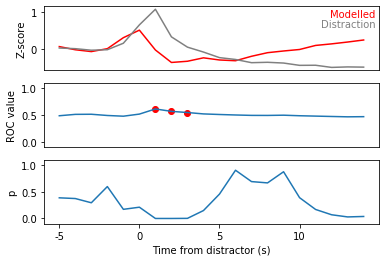

In [11]:
f, ax = plt.subplots(nrows=3)

ax[0].plot(np.mean(photo_snips_mod_day_flat, axis=0), color='red')
ax[0].plot(np.mean(photo_snips_dis_day_flat, axis=0), color='grey')

ax[0].set_ylabel('Z-score')
ax[0].set_xticks([])

ax[0].text(0.99, 0.95, 'Modelled', color='red', ha='right', va='top', transform=ax[0].transAxes)
ax[0].text(0.99, 0.80, 'Distraction', color='grey', ha='right', va='top', transform=ax[0].transAxes)

ax[1].plot(a)
ax[1].set_ylabel('ROC value')
ax[1].set_xticks([])

threshold = 0.05/len(p)
sigpoints = np.array([pval < threshold for pval in p], dtype=bool)

xdata = [x for x, L in zip(range(len(sigpoints)), sigpoints) if L]
ydata = logical_subset(a, sigpoints)
ax[1].scatter(xdata, ydata, color='red')

ax[1]. set_ylim([-0.1, 1.1])

ax[2].plot(p)
ax[2].set_ylim([-0.1, 1.1])
ax[2].set_ylabel('p')

ax[2].set_xticks([0, 5, 10, 15])
ax[2].set_xticklabels(['-5', '0', '5', '10'])
ax[2].set_xlabel('Time from distractor (s)')

# f.savefig(outputfolder + "photo_roc_analysis.png")

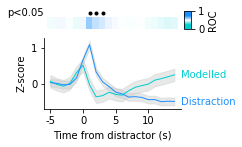

In [26]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

f = plt.figure(figsize=(3.4,2))

gs=gridspec.GridSpec(2,2, figure=f, height_ratios=[0.25, 1], width_ratios=[1, 0.05], wspace=0.05,
                    bottom=0.2, right=0.75, left=0.15)

ax[0] = f.add_subplot(gs[0, 0])

# Creates colormap for ROC

cdict = [(0, 'darkturquoise'), (0.25, 'darkturquoise'), (0.5, 'white'), (0.75, 'dodgerblue'), (1, 'dodgerblue')]
heatmap_color_scheme = LinearSegmentedColormap.from_list('rocmap', cdict)

roc_for_plot = a + [0]
xvals=np.arange(-0.5,20.5)
yvals=[1, 2]
xx, yy = np.meshgrid(xvals, yvals)
    
mesh = ax[0].pcolormesh(xx, yy, [roc_for_plot, roc_for_plot], cmap=heatmap_color_scheme, shading = 'flat')
mesh.set_clim([0, 1])


xdata = [x for x, L in zip(range(len(sigpoints)), sigpoints) if L]
ydata = logical_subset(a, sigpoints)
ax[0].scatter(xdata, [2.5]*len(xdata), color='k', marker='.', clip_on=False)
ax[0].text(-1, 2.5, 'p<0.05', va='center', ha='right')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xticks([])
ax[0].set_yticks([])


cbar_ax = f.add_subplot(gs[0,1])   
cbar = f.colorbar(mesh, cax=cbar_ax, ticks=[0, 1], label='ROC')

ax[1] = f.add_subplot(gs[1, 0])

shadedError(ax[1], photo_snips_mod_day_flat, linecolor='darkturquoise')
shadedError(ax[1], photo_snips_dis_day_flat, linecolor='dodgerblue')

ax[1].set_ylabel('Z-score')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xticks([0, 5, 10, 15])
ax[1].set_xticklabels(['-5', '0', '5', '10'])
ax[1].set_xlabel('Time from distractor (s)')

ax[1].text(20, np.mean(photo_snips_mod_day_flat, axis=0)[-1], 'Modelled', color='darkturquoise', ha='left', va='center')
ax[1].text(20, np.mean(photo_snips_dis_day_flat, axis=0)[-1], 'Distraction', color='dodgerblue', ha='left', va='center')

ax[0].set_xlim(ax[1].get_xlim())

f.savefig(figfolder+"fig3_roc-photo-modVdis.pdf")


In [58]:
epoch1_mod, epoch1_dis = [], []
epoch2_mod, epoch2_dis = [], []
epoch3_mod, epoch3_dis = [], []

for day, epoch1, epoch2, epoch3 in zip([photo_snips_mod_day, photo_snips_dis_day],
                             [epoch1_mod, epoch1_dis],
                              [epoch2_mod, epoch2_dis],
                                      [epoch3_mod, epoch3_dis]):
    for rat in day:
        e1, e2, e3 = [], [], []
        for snip in rat:
            e1.append(np.mean(snip[0:5]))
            e2.append(np.mean(snip[6:9]))
            e3.append(np.mean(snip[9:]))
        epoch1.append(np.mean(e1))
        epoch2.append(np.mean(e2))
        epoch3.append(np.mean(e3))

    
#     print(e1)
#     epoch1.append(np.mean(e1))
    
#     pre_dis, pre_notdis = [], []
#     post_dis, post_notdis = [], []
    
#     for snip in snips:
        
#         nlicks_before_distractor = len([lick for lick in snip if lick<0])
#         nlicks_after_distractor = len([lick for lick in snip if lick>1])
        
#         if check_val_between(snip):
#             pre_notdis.append(nlicks_before_distractor)
#             post_notdis.append(nlicks_after_distractor)
#         else:
#             pre_dis.append(nlicks_before_distractor)
#             post_dis.append(nlicks_after_distractor)

#     pre_lickrate_dis.append(np.mean(pre_dis)/10) # dividing by 10 puts this into Hz as a 10s predistractor period is used
#     pre_lickrate_notdis.append(np.mean(pre_notdis)/10)
    
#     post_lickrate_dis.append(np.mean(post_dis)/10)
#     post_lickrate_notdis.append(np.mean(post_notdis)/10)

Epoch 1 - pre 0.7430495132300441 0.4706672019396775
Epoch 2 - dis -2.7938530643336805 0.015207585946736157
Epoch 3 - post 0.4336395958584519 0.6716593062202525


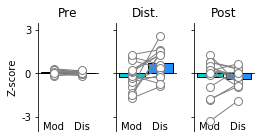

In [102]:
       
f, ax = plt.subplots(figsize=(4,2), ncols=3)
f.subplots_adjust(left=0.15, wspace=0.3)

colors=['darkturquoise', 'dodgerblue']

barscatter([epoch1_mod, epoch1_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[0])

barscatter([epoch2_mod, epoch2_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[1])

barscatter([epoch3_mod, epoch3_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           ax=ax[2])

for axis in ax:
    axis.set_xticks([])
    axis.set_ylim([-4, 3.5])
    axis.set_yticks([-3, 0, 3])
    axis.set_yticklabels([])
    axis.text(1, -3.9, 'Mod', ha='center')
    axis.text(2, -3.9, 'Dis', ha='center')
    
ax[0].set_ylabel('Z-score')


ax[0].set_yticklabels(["-3", '0', '3'])

ax[0].set_title('Pre')
ax[1].set_title('Dist.')
ax[2].set_title('Post')


# # ax[1].set_ylabel('Mean post-distractor lick rate (Hz)')
# ax[1].set_yticks([0, 5, 10])
# ax[1].set_ylim([-1, 15])
# ax[1].set_title('Post')

f.savefig(figfolder+"fig3_photo_modVdis_epochs.pdf")

from scipy import stats

t, p = stats.ttest_rel(epoch1_mod, epoch1_dis)
print('Epoch 1 - pre', t, p)

t, p = stats.ttest_rel(epoch2_mod, epoch2_dis)
print('Epoch 2 - dis', t, p)

t, p = stats.ttest_rel(epoch3_mod, epoch3_dis)
print('Epoch 3 - post', t, p)

In [54]:
p

[0.3875,
 0.374,
 0.2945,
 0.5985,
 0.17149999999999999,
 0.2115,
 0.0,
 0.0,
 0.002,
 0.14850000000000002,
 0.4575,
 0.905,
 0.692,
 0.6675,
 0.8765000000000001,
 0.39,
 0.169,
 0.0695,
 0.029,
 0.0375]